In [1]:
import pandas as pd
data = pd.read_csv(r'E:\data set\task 15\adult.csv')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Applying Cross-Validation to Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Features and target
X = data.drop('income', axis=1)
y = data['income']

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.77399048 0.76228501 0.82063882 0.8289312  0.82309582]
Mean CV score: 0.8017882681056333


 Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate Gradient Boosting Classifier
def evaluate_gb_model(n_estimators, learning_rate):
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    gb_classifier.fit(X_train, y_train)
    
    # Training and testing performance
    train_accuracy = accuracy_score(y_train, gb_classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))
    
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-" * 40)

# Test with different parameters
evaluate_gb_model(n_estimators=100, learning_rate=0.1)
evaluate_gb_model(n_estimators=200, learning_rate=0.05)
evaluate_gb_model(n_estimators=50, learning_rate=0.2)


n_estimators: 100, learning_rate: 0.1
Training Accuracy: 0.8670586170586171
Testing Accuracy: 0.8637526870713481
----------------------------------------
n_estimators: 200, learning_rate: 0.05
Training Accuracy: 0.8672341172341173
Testing Accuracy: 0.8643668748080663
----------------------------------------
n_estimators: 50, learning_rate: 0.2
Training Accuracy: 0.8684626184626184
Testing Accuracy: 0.8631384993346299
----------------------------------------


Evaluating Precision, Recall, and F1-Score for Random Forests

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.7434963579604579
Recall: 0.6106837606837607
F1-Score: 0.670577193805725


ROC Curve and AUC for Gradient Boosting Classifier

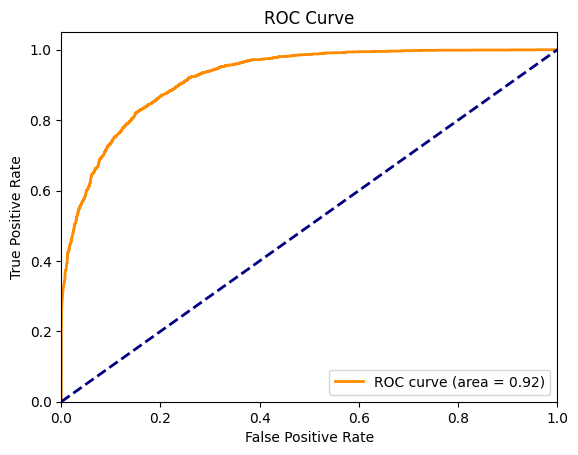

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Get prediction probabilities
y_prob = gb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Model Performance Comparison with Different Metrics

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Metrics to evaluate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    for metric in scoring:
        scores = cross_val_score(clf, X, y, cv=5, scoring=metric)
        print(f"{metric.capitalize()}: {np.mean(scores):.4f}")
    print("-" * 40)


Evaluating Random Forest...
Accuracy: 0.8018
Precision: 0.6300
Recall: 0.4884
F1: 0.5285
Roc_auc: 0.8549
----------------------------------------
Evaluating Gradient Boosting...
Accuracy: 0.8052
Precision: 0.6720
Recall: 0.4531
F1: 0.5101
Roc_auc: 0.8552
----------------------------------------
Evaluating SVM...
Accuracy: 0.7834


c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Syed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Precision: 0.3686
